In [ ]:
from titanfp import bench

data = bench.sweep_single(bench.cores['sqrt'],
                          bench.iter_1arg(range(-14, 16), range(1, 11), 1), 
                          64, 
                          bench.ctx128)



FPCore (x)
  name: None
   pre: None
  spec: None
  (sqrt x)
running with 64 total bits


KeyboardInterrupt: 

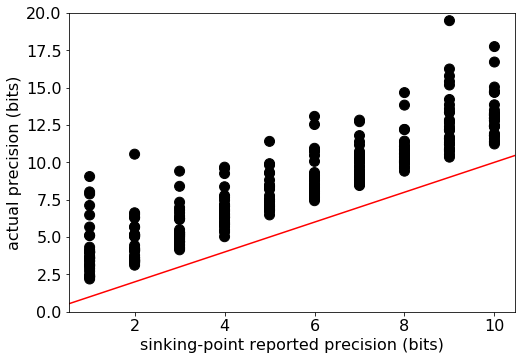

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import matplotlib
matplotlib.rcParams.update({'font.size': 16})


fig, ax = plt.subplots()

fig.set_size_inches(8, 5.5)

ax.set_ylim(0, 20)
ax.set_xlabel('sinking-point reported precision (bits)')
ax.set_ylabel('actual precision (bits)')

ax.scatter(xs, ys, s=100, color=greyscale)
#plt.ylim((0, 16))
#plt.xlim((0, 16))

xlim = ax.get_xlim()
line = mlines.Line2D(xlim, xlim, color='red')
#transform=ax.transAxes
#line.set_transform(transform)
ax.add_line(line)

plt.show()

# Write this as a cdf:

# one line for each number of ground truth bits bits
# plot % of reported bits

# x axis is y axis - x axis
# y axis is % points that are less than x axis
# separate line for each x axis position


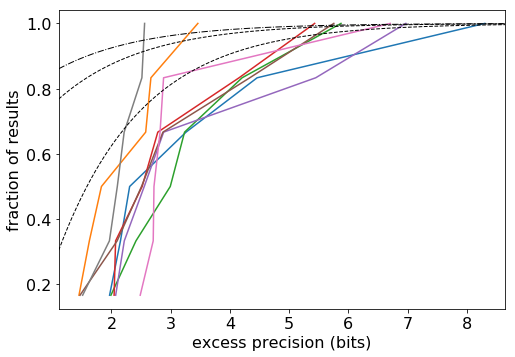

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

fig.set_size_inches(8, 5.5)

ax.set_xlabel('excess precision (bits)')
ax.set_ylabel('fraction of results')

for x_name, (cdf_xs, cdf_ys) in cdf_xys.items():
    ax.plot(cdf_xs, cdf_ys)
    
    
x_min, x_max = ax.get_xlim()
ref_x = np.linspace(x_min, x_max, 1000)
ref_y_one = [1 - (3/2) * (2**-x) for x in ref_x]
ref_y_zero = [1 - (1/2) * (2**-x) for x in ref_x]
ref_y_cancel = [1 - (0.3) * (2**-x) for x in ref_x]

line_one = mlines.Line2D(ref_x, ref_y_one, color='black', linestyle='--', linewidth=1)
line_zero = mlines.Line2D(ref_x, ref_y_zero, color='black', linestyle='--', linewidth=1)
line_cancel = mlines.Line2D(ref_x, ref_y_cancel, color='black', linestyle='-.', linewidth=1)
ax.add_line(line_one)
ax.add_line(line_zero)
ax.add_line(line_cancel)


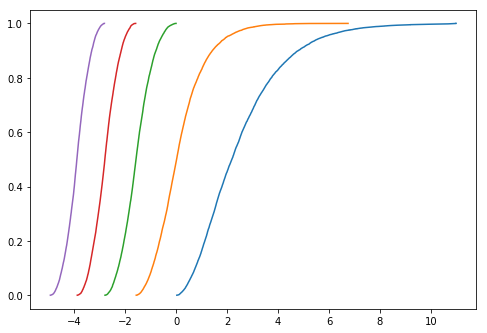

In [7]:
from titanfp import bench

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(8, 5.5)


for e in range(5):
    pts = []
    for i in range(10000):
        a_hi, a_lo = bench.gen_input(0, 24, 11)
        b_hi, b_lo = bench.gen_input(e, 24, 11)
        dif, logdif, sdif, logsdif = bench.bitsim(a_hi, b_hi)
        pts.append(logdif)
    
    xs = sorted(pts)
    ys = []

    count = 0
    for x in xs:
        count += 1
        ys.append(count / len(pts))

    ax.plot(xs, ys)

